# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns the notebook can display
pd.set_option('display.max_columns', 200)

In [2]:
house = pd.read_csv('housing.csv')

In [3]:
house.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [4]:
house.shape

(384977, 22)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [6]:
house.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [7]:
house.region.value_counts()

region
jacksonville      4246
columbus          3738
rochester         3677
jackson           3667
fayetteville      3652
                  ... 
southwest MS        12
st louis             9
southwest TX         9
fort smith, AR       5
kansas city          3
Name: count, Length: 404, dtype: int64

In [8]:
house.state.value_counts().head(8)

state
ca    33085
fl    31929
tx    31137
nc    18628
mi    14529
ga    13841
oh    12884
tn    11541
Name: count, dtype: int64

In [9]:
house.type.unique()

array(['apartment', 'condo', 'house', 'duplex', 'townhouse', 'loft',
       'manufactured', 'cottage/cabin', 'flat', 'in-law', 'land',
       'assisted living'], dtype=object)

In [10]:
house.drop(columns=['id','url','lat','long','region_url','image_url',
                    'description', 'electric_vehicle_charge', 
                    'smoking_allowed','wheelchair_access'
                   ], inplace=True)

In [11]:
house[20000:20005]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,comes_furnished,laundry_options,parking_options,state
20000,colorado springs,999,apartment,561,1,1.0,1,1,0,NaN,NaN,co
20001,colorado springs,1350,apartment,701,1,1.0,1,1,0,w/d in unit,attached garage,co
20002,colorado springs,999,apartment,561,1,1.0,1,1,0,laundry in bldg,NaN,co
20003,colorado springs,1169,apartment,1109,3,2.0,1,1,0,NaN,no parking,co
20004,colorado springs,958,apartment,561,1,1.0,1,1,0,NaN,NaN,co


In [12]:
house.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [13]:
house.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       nan, 'no laundry on site'], dtype=object)

# Data Cleaning

In [14]:
house.dtypes

region              object
price                int64
type                object
sqfeet               int64
beds                 int64
baths              float64
cats_allowed         int64
dogs_allowed         int64
comes_furnished      int64
laundry_options     object
parking_options     object
state               object
dtype: object

In [15]:
house.isna().sum()

region                  0
price                   0
type                    0
sqfeet                  0
beds                    0
baths                   0
cats_allowed            0
dogs_allowed            0
comes_furnished         0
laundry_options     79026
parking_options    140687
state                   0
dtype: int64

In [16]:
house['parking_options']=house.parking_options.fillna('no parking')
house['laundry_options'] = house.laundry_options.fillna('no laundry')

In [17]:
house.isna().sum()

region             0
price              0
type               0
sqfeet             0
beds               0
baths              0
cats_allowed       0
dogs_allowed       0
comes_furnished    0
laundry_options    0
parking_options    0
state              0
dtype: int64

# Feature Engineering

In [18]:
# Create new column for pets allowed
house['pets_allowed'] = (house['cats_allowed'] & house['dogs_allowed']).astype(int)
house = house.drop(['cats_allowed', 'dogs_allowed'], axis = 'columns')

In [19]:
house.head(8)

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,reno / tahoe,1148,apartment,1078,3,2.0,0,w/d in unit,carport,ca,1
1,reno / tahoe,1200,condo,1001,2,2.0,0,w/d hookups,carport,ca,0
2,reno / tahoe,1813,apartment,1683,2,2.0,0,w/d in unit,attached garage,ca,1
3,reno / tahoe,1095,apartment,708,1,1.0,0,w/d in unit,carport,ca,1
4,reno / tahoe,289,apartment,250,0,1.0,1,laundry on site,no parking,ca,1
5,reno / tahoe,1093,apartment,720,1,1.0,0,laundry in bldg,no parking,ca,1
6,reno / tahoe,935,apartment,661,1,1.0,0,laundry on site,off-street parking,ca,1
7,reno / tahoe,1095,apartment,708,1,1.0,0,w/d in unit,carport,ca,1


In [20]:
is_a_parking = ['carport', 'attached garage', 'off-street parking', 'detached garage', 'valet parking']
house.parking_options=house.parking_options.apply(lambda x: 1 if x in is_a_parking else 0)

In [21]:
is_a_laundry = ['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg']
house.laundry_options=house.laundry_options.apply(lambda x: 1 if x in is_a_laundry else 0)

In [22]:
house.head(8)

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,reno / tahoe,1148,apartment,1078,3,2.0,0,1,1,ca,1
1,reno / tahoe,1200,condo,1001,2,2.0,0,1,1,ca,0
2,reno / tahoe,1813,apartment,1683,2,2.0,0,1,1,ca,1
3,reno / tahoe,1095,apartment,708,1,1.0,0,1,1,ca,1
4,reno / tahoe,289,apartment,250,0,1.0,1,1,0,ca,1
5,reno / tahoe,1093,apartment,720,1,1.0,0,1,0,ca,1
6,reno / tahoe,935,apartment,661,1,1.0,0,1,1,ca,1
7,reno / tahoe,1095,apartment,708,1,1.0,0,1,1,ca,1


In [23]:
# cleaning the region variable
def region_foward_slash(x):
    tokens = x.split('/')
    return tokens[0].strip()
house.region = house.region.apply(lambda x: region_foward_slash(x))

In [24]:
def strip_last_two_uppercase_chars(string):
    if string[-2:].isupper():
        return string[:-2].strip()
    return(string)
house.region = house.region.apply(lambda x: strip_last_two_uppercase_chars(x))

In [25]:
house.region= house.region.apply(lambda x: 'west virginia' if x=='west virginia (old)' else x)
house.query('region=="west virginia (old)"')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed


In [26]:
house.region.unique()[:10]

array(['reno', 'sacramento', 'boulder', 'visalia-tulare', 'santa barbara',
       'SF bay area', 'siskiyou county', 'ventura county', 'san diego',
       'san luis obispo'], dtype=object)

In [27]:
house.state.unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

# Dimensionality Reduction

In [28]:
house.head(8)

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,reno,1148,apartment,1078,3,2.0,0,1,1,ca,1
1,reno,1200,condo,1001,2,2.0,0,1,1,ca,0
2,reno,1813,apartment,1683,2,2.0,0,1,1,ca,1
3,reno,1095,apartment,708,1,1.0,0,1,1,ca,1
4,reno,289,apartment,250,0,1.0,1,1,0,ca,1
5,reno,1093,apartment,720,1,1.0,0,1,0,ca,1
6,reno,935,apartment,661,1,1.0,0,1,1,ca,1
7,reno,1095,apartment,708,1,1.0,0,1,1,ca,1


In [29]:
house.type.value_counts()

type
apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: count, dtype: int64

In [30]:
type_list = house.type.value_counts()[house.type.value_counts()<15885]

In [31]:
house.type=house.type.apply(lambda x: 'other' if x in type_list else x)

In [32]:
house.type.value_counts()

type
apartment    318032
house         33266
other         17794
townhouse     15885
Name: count, dtype: int64

# Feature Understanding

In [33]:
house.describe()

,price,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,pets_allowed
count,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000
mean,8.825722e+03,1.059900e+03,1.905345,1.480718,0.048128,0.785312,0.584843,0.694348
std,4.462200e+06,1.915076e+04,3.494572,0.618061,0.214036,0.410606,0.492750,0.460684
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000


[]

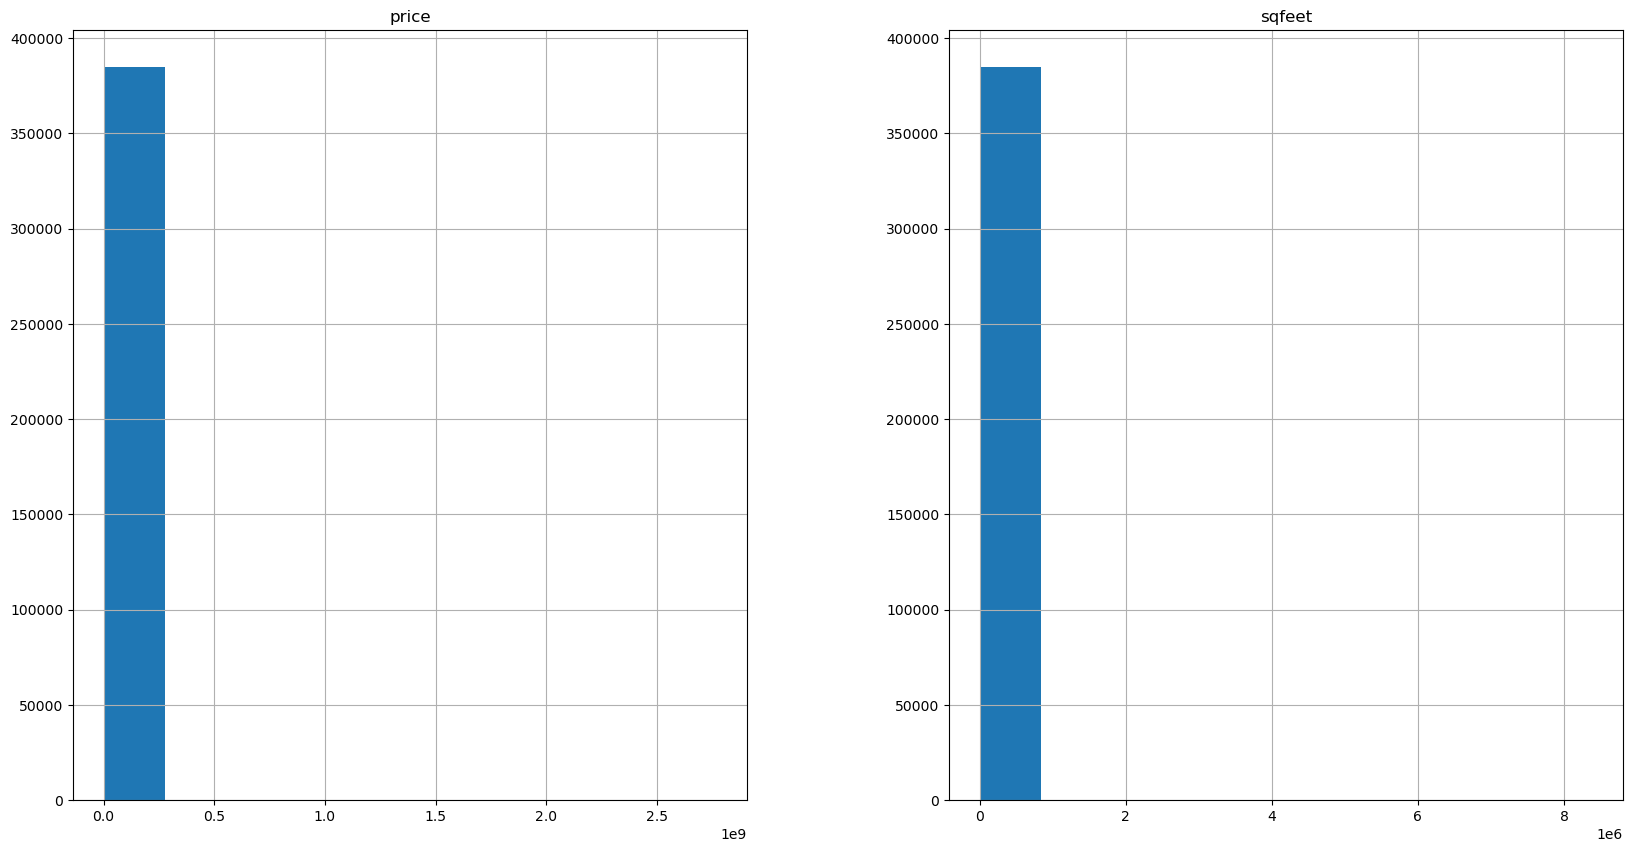

In [34]:
# Plot Numerical Variables
%matplotlib inline
house[['price', 'sqfeet']].hist(figsize=(20, 10))
plt.plot()

This visualization indicates that certain rental homes have a price listed as 0, along with a square footage of 0. As per zoning regulations, a house must have a minimum square footage of 120, and at least one room must be suitable for habitation. Therefore, we need to eliminate these outliers from the dataset.

In [35]:
house.beds.value_counts()

beds
2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: count, dtype: int64

In [36]:
house.baths.value_counts()

baths
1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: count, dtype: int64

The majority of homes typically feature up to 3 bedrooms and 3 bathrooms. Hence, we should exclude properties with more than 4 bedrooms or 4 bathrooms. Additionally, considering that a typical 4-bedroom home ranges from approximately 2000 to 5000 square feet, we can filter out rental properties exceeding 5000 square feet in size.

# Removing Outliers

In [37]:
# Square feet outliers removal
house.query('sqfeet<120 or sqfeet>5000')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
546,reno,817,apartment,70,1,1.0,0,1,0,ca,1
625,reno,1995,house,17951,3,2.0,0,1,1,ca,0
929,reno,1950,house,5081,3,2.5,0,1,1,ca,0
2134,sacramento,2025,apartment,13,3,2.0,0,1,1,ca,0
3481,sacramento,5500,house,5282,6,5.0,0,1,0,ca,0
...,...,...,...,...,...,...,...,...,...,...,...
382061,orange county,900,house,75,1,1.0,0,0,0,ca,0
382276,orange county,6025,house,5452,4,4.0,0,0,0,ca,1
383234,palm springs,6010,house,5251,4,4.0,0,0,0,ca,0
383424,palm springs,1480,apartment,105,2,2.0,0,1,1,ca,1


In [38]:
house = house.query('sqfeet>=120 and sqfeet<=5000')
house.shape

(383668, 11)

In [39]:
# remove home with more than 4 bedrooms and 4 bathrooms
house.query('beds>4 or baths>4')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
107,reno,1125,apartment,1939,5,2.5,0,0,0,ca,0
930,reno,2495,house,3300,5,3.0,0,1,1,ca,0
1266,reno,3900,house,3744,4,4.5,0,1,1,ca,1
1337,sacramento,1475,apartment,916,2,5.0,0,1,1,ca,1
1407,sacramento,2900,house,2900,7,3.0,0,1,1,ca,0
...,...,...,...,...,...,...,...,...,...,...,...
383769,palm springs,2195,house,2300,5,2.0,0,1,1,ca,1
383916,palm springs,3210,house,2426,5,3.0,0,0,0,ca,1
383919,palm springs,4250,house,3464,4,4.5,0,1,1,ca,0
384058,redding,3500,house,5000,5,3.0,0,0,1,ca,1


In [40]:
house = house.query('beds<=4 and baths<=4')
house.shape

(380886, 11)

In [41]:
# Drop rows with 0 bedrooms or 0 bathrooms
house = house[(house["beds"] != 0) & (house["baths"] != 0)]

In [42]:
# remove the price outliers by region using one standard deviation
def remove_price_outliers(house):
    df_out = pd.DataFrame()
    for key, subdf in house.groupby('region'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

house=remove_price_outliers(house)
house.shape

(308967, 11)

In [43]:
house.price.describe()

count    308967.000000
mean       1146.329417
std         559.598638
min           0.000000
25%         825.000000
50%        1025.000000
75%        1343.000000
max       78900.000000
Name: price, dtype: float64

In [44]:
q_high,q_low = house.price.quantile(0.999),house.price.quantile(0.001)
q_high,q_low

(4340.0, 169.93200000000002)

Approximately 99.8% of the rental property prices in the dataset range from 150 to 4395. Hence, we can eliminate prices below 100 and above 5000.

In [45]:
house = house.query('price>100 and price<5000').copy()

[]

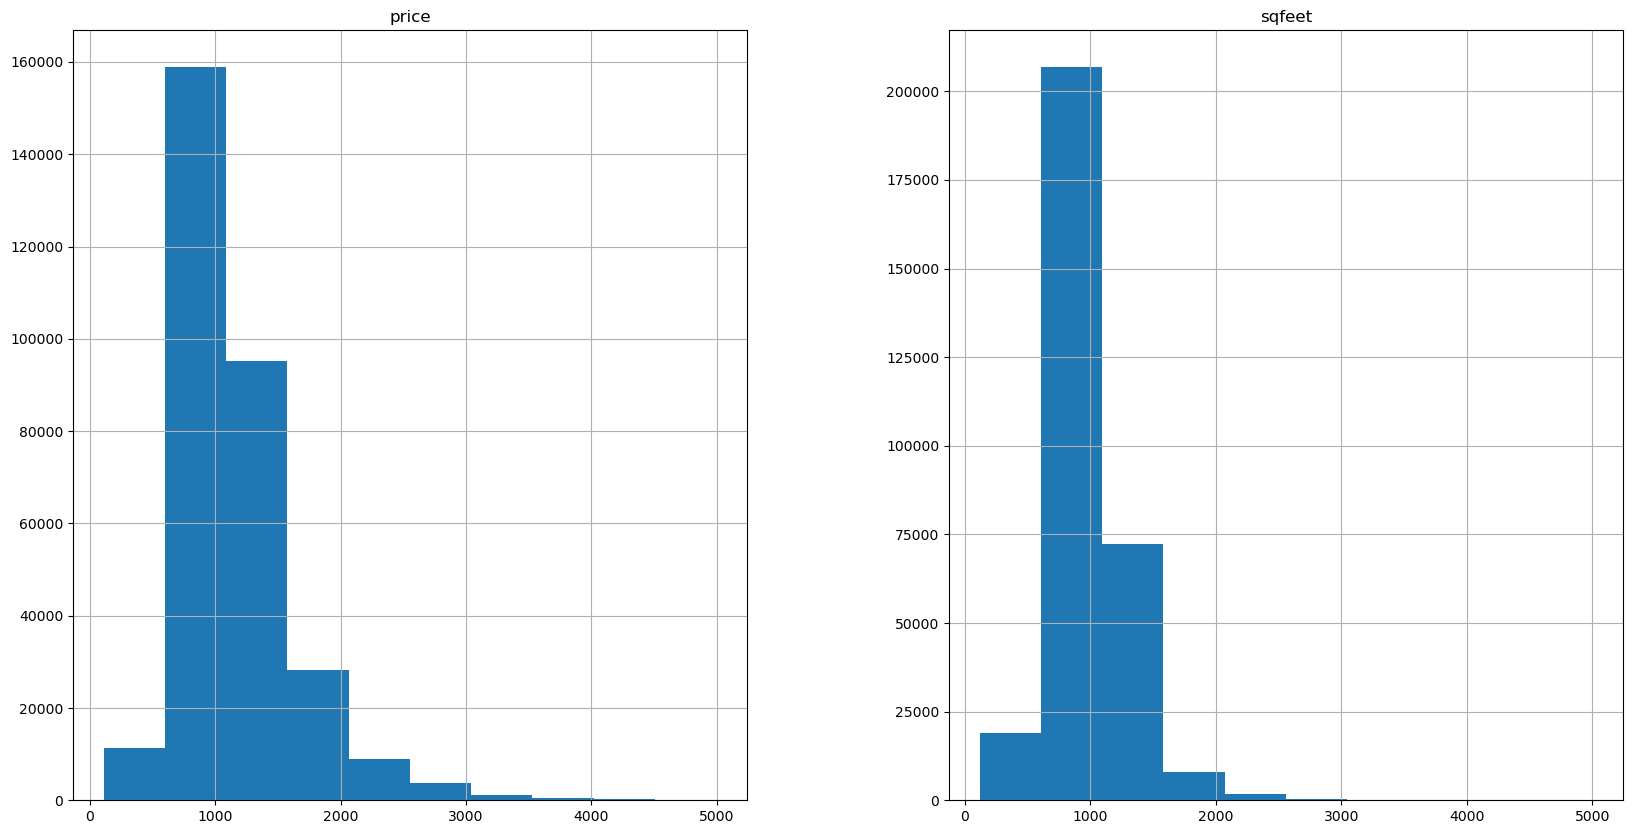

In [46]:
%matplotlib inline
house[['price','sqfeet']].hist(figsize=(20,10))
plt.plot()

The distribution of price and square footage data follows a normal distribution pattern. The majority of rental house prices fall within the range of 500 to 2000.

# Features Relationship

In [47]:
house.parking_options = house.parking_options.astype(int)
house.parking_options.dtypes
house.head()

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,SF bay area,1650,apartment,325,1,1.0,0,0,1,ca,0
1,SF bay area,1495,other,500,1,1.0,0,0,0,ca,0
2,SF bay area,2900,house,1258,3,2.0,0,1,1,ca,1
3,SF bay area,3400,apartment,850,2,1.0,0,1,1,ca,0
4,SF bay area,1895,other,500,2,1.0,0,0,0,ca,0


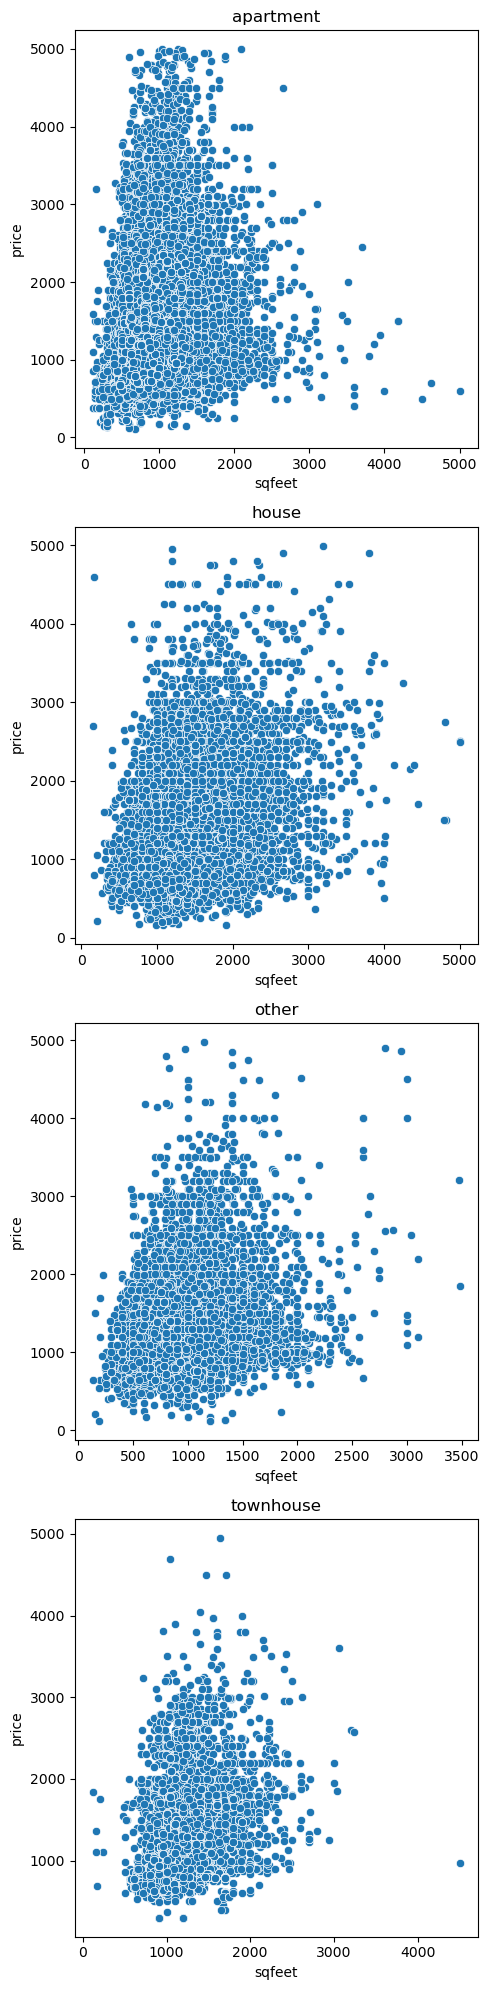

In [48]:
# create a new figure to hold the subplots
fig, axes = plt.subplots(nrows=len(house['type'].unique()), figsize=(5,20))

# loop through each unique state and create a scatterplot on its own subplot
for i, (key, subdf) in enumerate(house.groupby('type')):
    sns.scatterplot(x=subdf.sqfeet, y=subdf.price, ax=axes[i])
    axes[i].set_title(key)  # set the title to the name of the state
    
# display the plots
plt.tight_layout()
plt.show()

# Data Correlation

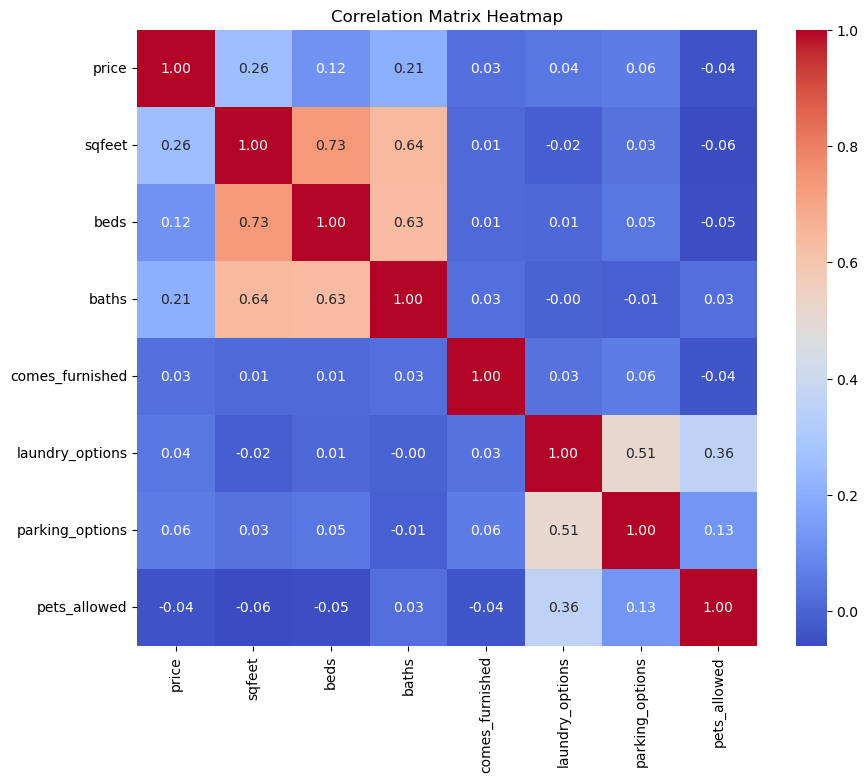

In [49]:
numerical_cols= ['price','sqfeet', 'beds', 'baths',
                 'comes_furnished', 'laundry_options',
                 'parking_options', 'pets_allowed']
# Select only the numerical columns from 'house'
numeric_cols = house[numerical_cols]

# Calculate the correlation matrix for the selected numerical columns
correlation = numeric_cols.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Bedrooms and square footage exhibit a strong positive correlation, while baths and bedrooms also show a positive correlation.

# Label Encoding With OneHOtEncoding

In [50]:
house.head()

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,SF bay area,1650,apartment,325,1,1.0,0,0,1,ca,0
1,SF bay area,1495,other,500,1,1.0,0,0,0,ca,0
2,SF bay area,2900,house,1258,3,2.0,0,1,1,ca,1
3,SF bay area,3400,apartment,850,2,1.0,0,1,1,ca,0
4,SF bay area,1895,other,500,2,1.0,0,0,0,ca,0


In [51]:
dummies1 = pd.get_dummies(house.region)
dummies2 = pd.get_dummies(house.type)
dummies3 = pd.get_dummies(house.state)
new_house = pd.concat([house,dummies1,dummies2,dummies3], axis = 'columns').drop(['region','type','state'], axis = 'columns')

In [52]:
new_house.head()

,price,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,pets_allowed,SF bay area,abilene,akron,albany,albuquerque,altoona-johnstown,amarillo,ames,anchorage,ann arbor,annapolis,appleton-oshkosh-F,asheville,ashtabula,athens,atlanta,auburn,augusta,austin,bakersfield,baltimore,baton rouge,battle creek,beaumont,bellingham,bemidji,bend,billings,binghamton,birmingham,bismarck,bloomington,bloomington-normal,boise,boone,boston,boulder,bowling green,bozeman,brainerd,brownsville,brunswick,buffalo,butte,cape cod,catskills,cedar rapids,central,central louisiana,central michigan,champaign urbana,charleston,charlotte,charlottesville,chattanooga,chautauqua,chicago,chico,chillicothe,cincinnati,clarksville,cleveland,clovis,college station,colorado springs,columbia,columbus,cookeville,corpus christi,corvallis,cumberland valley,dallas,danville,dayton,daytona beach,decatur,deep east texas,del rio,delaware,denver,des moines,detroit metro,dothan,dubuque,duluth,east idaho,east oregon,eastern,eastern kentucky,eastern montana,eastern panhandle,eastern shore,...,texoma,the thumb,toledo,topeka,treasure coast,tri-cities,tucson,tulsa,tuscaloosa,tuscarawas co,twin falls,twin tiers,tyler,upper peninsula,utica-rome-oneida,valdosta,ventura county,vermont,victoria,visalia-tulare,waco,"washington,",waterloo,watertown,wausau,wenatchee,west virginia,western,western maryland,western massachusetts,western slope,wichita,wichita falls,williamsport,wilmington,winchester,winston-salem,worcester,wyoming,yakima,york,youngstown,yuba-sutter,yuma,zanesville,apartment,house,other,townhouse,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy
0,1650,325,1,1.0,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1495,500,1,1.0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [53]:
new_house.shape

(308558, 453)

# Build Model

In [54]:
# Splitting the data into features X and target variable Y
X = new_house.drop('price', axis = 'columns')
y = new_house.price
# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

In [55]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [56]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.7538060137743942

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
# Make predictions using the trained model on the test set
y_pred = lr.predict(X_test)

In [59]:
print(y_pred)

[1383.7901678  1292.69043874 1403.66977951 ...  932.9723922   871.07731489
 1395.94020726]


In [60]:
# Calculate R-squared for training set
train_score = lr.score(X_train, y_train)

In [61]:
# Calculate R-squared for testing set
test_score = lr.score(X_test, y_test)

In [62]:
print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

Training R-squared score: 0.7583698966614738
Testing R-squared score: 0.7538060137743942


In [63]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [64]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [65]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [66]:
# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
r_squared = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

In [67]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r2)

Mean Absolute Error (MAE): 157.3458826614135
Mean Squared Error (MSE): 55812.68028607039
Root Mean Squared Error (RMSE): 236.2470746614027
Adjusted R-squared: 0.7519894695641725


In [68]:
ab_percentage = np.abs((y_test-y_pred) / y_test) * 100

In [69]:
mape = np.mean(ab_percentage)

In [70]:
print(mape)

14.184453665813743
